# O quanto fatores socioeconômicos influenciam a taxa de suicídios no Brasil?

Como o PIB, PIB per capita, Renda Nacional Bruta (RNB), RNB per capita, taxa de inflação e razão de emprego na população impactam o número de suicídios do Brasil? Embora muitas outras variáveis possam afetar a taxa de suicídios, este estudo se limita a estudar tal número à luz dessas variáveis específicas.

O suicídio é um problema cada mais comum em todo o mundo, e o Brasil não é exceção. [Números alarmantes](https://www.saude.ba.gov.br/2020/09/10/oms-alerta-suicidio-e-a-3a-causa-de-morte-de-jovens-brasileiros-entre-15-e-29-anos/) são sempre mostrados em notícias sobre o assunto. Por isso, a ideia desse estudo é tentar entender o comportamento desse número mediante a fatores socioeconômicos. E, quem sabe, assim possamos prever os próximos valores, e ajudar a criar políticas públicas para trabalhar nesse assunto.

Este estudo utiliza dados da [OMS](https://www.who.int/health-topics/suicide) e do [Banco Mundial](https://data.worldbank.org/) que foram extraídos, agrupados e publicados por [Ronald Onyango](https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022). Segundo Ronald:
> "Este conjunto de dados oferece uma visão abrangente das tendências globais de suicídio de 1990 a 2022, com foco nas taxas brutas de suicídio. Ele fornece dados sobre região, país, ano e métricas-chave de suicídio [...]".

A lista de variáveis é:
* **RegionCode:** Identificador único para a região (por exemplo, Sul da Ásia, Europa).
* **RegionName:** Nome completo da região.
* **CountryCode:** Identificador único para o país.
* **CountryName:** Nome completo do país.
* **Year:** Ano em que os dados foram coletados.
* **Sex:** Gênero a que os dados se referem.
* **AgeGroup:** Faixa etária a que os dados se referem.
* **Generation:** Geração a que os dados se referem.
* **SuicideCount:** Número de suicídios registrados naquele país, ano, faixa etária e gênero.
* **CauseSpecificDeathPercentage:** Percentual de mortes totais atribuídas ao suicídio dentro de uma determinada população.
* **DeathRatePer100K:** Taxa bruta de mortes por suicídio por 100.000 pessoas.
* **Population:** Número da população naquele país e ano.
* **GDP:** PIB (Produto Interno Bruto) da população naquele país e ano.
* **GDPPerCapita:** PIB (Produto Interno Bruto) per capita da população naquele país e ano.
* **GrossNationalIncome:** RNB (Renda Nacional Bruta) da população naquele país e ano.
* **GNIPerCapita:** RNB (Renda Nacional Bruta) per capita da população naquele país e ano.
* **InflationRate:** Taxa de inflação da população naquele país e ano.
* **EmploymentPopulationRatio:** Percentual de empregabilidade da população naquele país e ano.

Porém, nós iremos limpar o conjunto de dados para só focarmos nos dados do Brasil.

Nós iremos avaliar o quanto DeathRatePer100K é influenciada pelos fatores econômicos (e não SuicideCount porque não leva em consideração o tamanho da população), e tentaremos criar uma regressão linear com mais de 80% de coeficiente de determinação e p-value menor do que 5%.

## Importações

Pandas será utilizado para trabalhar com o conjunto de dados no formato de dataframe; Seaborn e Pyplot serão usados para plotar os gráficos; Numpy e Scipy são para calcular mapas de calor de p-values; Statsmodels para criar o modelo de regressão linear e, por fim, Warnings será usado apenas para ignorar possíveis avisos que não sejam erros.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

Importando o arquivo CSV com os dados.

In [95]:
df = pd.read_csv("./suicide_rates_1990-2022.csv")
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


# Exploração de Dados

## Estrutura e Schema

In [96]:
df.shape

(118560, 18)

O conjunto de dados tem ao todo 118560 linhas e 18 colunas.

In [97]:
df.dtypes

RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                              int64
Sex                              object
AgeGroup                         object
Generation                       object
SuicideCount                    float64
CauseSpecificDeathPercentage    float64
DeathRatePer100K                float64
Population                      float64
GDP                             float64
GDPPerCapita                    float64
GrossNationalIncome             float64
GNIPerCapita                    float64
InflationRate                   float64
EmploymentPopulationRatio       float64
dtype: object

Esses são os nomes das colunas e seus respectivos tipos. `object` quer dizer que se trata de uma variável categórica; `int64` quer dizer que se trata de uma váriavel quantitativa discreta; e `float64` quer dizer que se trata de uma variável quantitativa contínua.

In [98]:
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
RegionCode,118560,6,EU,45140
RegionName,118560,6,Europe,45140
CountryCode,118560,117,ARG,1740
CountryName,118560,117,Argentina,1740
Sex,118560,3,Male,58320
AgeGroup,118560,7,0-14 years,23712
Generation,118560,7,Generation Alpha,23712


Considerando somente as variáveis qualitativas, temos em ordem: seu nome, a quantidade de linhas preenchidas, a quantidade de categorias, qual a moda, e a frequência da moda.

In [99]:
for col in df.select_dtypes("object"):
    if col not in ['CountryCode', 'CountryName']:
        value_string = ""
        for value in df[col].unique():
            value_string += (value + " | ")
        print(col + ":", value_string[0:-2])
        print('-'*100)

RegionCode: EU | CSA | AS | OA | NAC | AF 
----------------------------------------------------------------------------------------------------
RegionName: Europe | Central and South America | Asia | Oceania | North America and the Caribbean | Africa 
----------------------------------------------------------------------------------------------------
Sex: Male | Female | Unknown 
----------------------------------------------------------------------------------------------------
AgeGroup: 0-14 years | 15-24 years | 25-34 years | 35-54 years | 55-74 years | 75+ years | Unknown 
----------------------------------------------------------------------------------------------------
Generation: Generation Alpha | Generation Z | Millennials | Generation X | Baby Boomers | Silent Generation | Unknown 
----------------------------------------------------------------------------------------------------


Acima, temos todas as categorias exceto os países, pois como há 117 deles, vamos vê-los abaixo.

In [100]:
country_string = ""
for country in df['CountryName'].unique():
    country_string += (country + " | ")
    
print(country_string[0:-2])

Albania | Argentina | Armenia | Australia | Austria | Azerbaijan | Bahrain | Bahamas | Antigua and Barbuda | Barbados | Belarus | Belgium | Belize | Bosnia and Herzegovina | Brazil | Brunei Darussalam | Bulgaria | Cabo Verde | Canada | Chile | Colombia | Costa Rica | Croatia | Cuba | Cyprus | Czechia | Denmark | Dominica | Dominican Republic | Ecuador | Egypt | El Salvador | Estonia | Fiji | Finland | France | French Guiana | Georgia | Germany | Greece | Grenada | Guadeloupe | Guatemala | Guyana | China, Hong Kong SAR | Hungary | Iceland | Iran (Islamic Republic of) | Iraq | Ireland | Israel | Italy | Jamaica | Japan | Kazakhstan | Republic of Korea | Kuwait | Kyrgyzstan | Latvia | Lithuania | Luxembourg | Maldives | Malta | Martinique | Mauritius | Mayotte | Mexico | Republic of Moldova | Montenegro | Netherlands | New Zealand | Nicaragua | North Macedonia | Norway | Panama | Paraguay | Peru | Philippines | Poland | Portugal | Puerto Rico | R?union | Romania | Russian Federation | Sai

In [101]:
df.select_dtypes("number").describe().apply(lambda s: s.apply('{0:.2f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
Year,118560.00,2005.74,8.75,1990.00,1999.00,2006.00,2013.00,2022.00
SuicideCount,118096.00,63.63,254.10,0.00,0.00,4.00,32.00,6787.00
CauseSpecificDeathPercentage,114271.00,3.87,7.32,0.00,0.00,0.59,4.36,100.00
DeathRatePer100K,107896.00,12.30,21.02,0.00,0.00,4.45,15.38,502.51
Population,112640.00,24561843.03,45311558.15,40542.00,2613804.75,6888434.50,25333641.75,332031554.00
GDP,111320.00,488335127674.53,1653251709667.09,219762963.00,11625848975.00,62682159338.00,301355000000.00,23315100000000.00
GDPPerCapita,111320.00,17423.51,19332.14,60.24,3941.60,9708.14,25197.27,133711.79
GrossNationalIncome,108600.00,497679509772.38,1689590791676.31,208283229.90,11767951193.00,59877146874.00,305721000000.00,23705300000000.00
GNIPerCapita,107800.00,22147.22,18886.40,780.00,8670.00,16150.00,29530.00,152630.00
InflationRate,104100.00,20.29,163.10,-10.63,1.50,3.04,6.54,4734.91


Agora, temos as variáveis quantitativas, e em ordem: seu nome, a quantidade de linhas preenchidas, a média, o desvio-padrão, o valor mínimo e os 4 quartis.

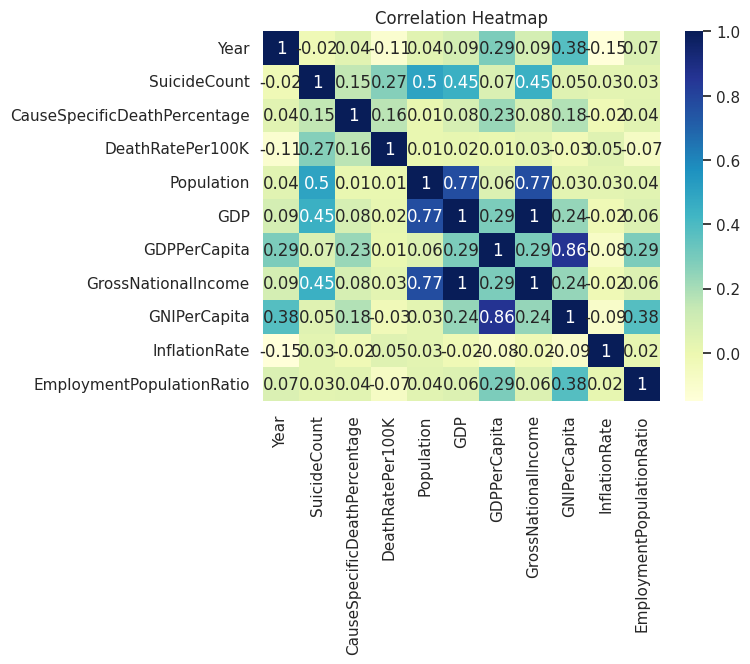

In [102]:
dataplot = sns.heatmap(df.corr(numeric_only=True).round(2), cmap="YlGnBu", annot=True)
dataplot.set(title="Correlation Heatmap")
plt.show()

A população tem uma clara correlação com o PIB e o RNB, o que pode ser explicado pelo fato de que quanto mais populoso o país, mesmo quando o PIB e o RNB per capita são baixos, maior será o PIB e o RNB gerais, já que milhões de pessoas recebendo 1 dólar somam milhões de dólares. Por causa disso, **GDPPerCapita** e **GNIPerCapita** continuarão no conjunto de dados, mas **GDP** e **GNI** terão que ser excluídos.

## Dados faltantes

Vamos ver quantos dados faltantes existem de cada variável.

In [103]:
def show_missing_data(df: pd.DataFrame) -> None:
    percentage_list = []
    for col in df.columns:
        if df[col].isna().any():
            qtt, _ = df[df[col].isna()].shape
            total, _ = df.shape
            percentage_row = { 'Column': col, 'Quantity': qtt, 'Percentage': str(round(100*qtt/total,2)) + "%" }
            percentage_list.append(percentage_row)
            
    percentage_row = pd.DataFrame(percentage_list)        
    print(percentage_row)

show_missing_data(df)

                         Column  Quantity Percentage
0                  SuicideCount       464      0.39%
1  CauseSpecificDeathPercentage      4289      3.62%
2              DeathRatePer100K     10664      8.99%
3                    Population      5920      4.99%
4                           GDP      7240      6.11%
5                  GDPPerCapita      7240      6.11%
6           GrossNationalIncome      9960       8.4%
7                  GNIPerCapita     10760      9.08%
8                 InflationRate     14460      12.2%
9     EmploymentPopulationRatio     11120      9.38%


Percentualmente, não há _tantos_ dados faltantes, e nenhuma coluna está em estado crítico o suficiente para ser removida em decorrência de falta de dados.

## Transformação dos Dados

Agora que já conseguimos ter uma visão inicial do conjunto de dados, vamos deixá-lo apto para o nosso estudo. Começaremos deixando somente os dados que se tratam do Brasil.

In [104]:
df = df.loc[df.CountryCode == 'BRA']
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
11740,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11741,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11742,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,1.0,0.023753,0.010931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11743,CSA,Central and South America,BRA,Brazil,1990,Male,0-14 years,Generation Alpha,33.0,0.721469,0.395270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,CSA,Central and South America,BRA,Brazil,1990,Male,15-24 years,Generation Z,249.0,2.038310,3.337410,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos remover as seguintes colunas:
* **RegionName:** Não é mais necessário, já que só veremos dados brasileiros.
* **RegionCode:** Não é mais necessário, já que só veremos dados brasileiros.
* **CountryName:** Não é mais necessário, já que só veremos dados brasileiros.
* **CountryCode:** Não é mais necessário, já que só veremos dados brasileiros.
* **SuicideCount**: Não leva em consideração o tamanho da população, enquanto **DeathRatePer100K** leva.
* **CauseSpecificDeathPercentage**: O objetivo deste estudo é entender a quantidade de suicídios por fatores socioeconômicos, não quantas mortes são suicídios.
* **GDP**: Não leva em consideração o tamanho da população, enquanto **GDPPerCapita** leva.
* **GrossNationalIncome**: Não leva em consideração o tamanho da população, enquanto **GNIPerCapita** leva.

In [105]:
df.drop(['RegionName', 'RegionCode', 'CountryName', 'CountryCode', 'CauseSpecificDeathPercentage', 'SuicideCount', 'GDP', 'GrossNationalIncome'], axis=1, inplace=True)
df.head()

,Year,Sex,AgeGroup,Generation,DeathRatePer100K,Population,GDPPerCapita,GNIPerCapita,InflationRate,EmploymentPopulationRatio
11740,1990,Male,0-14 years,Generation Alpha,0.000000,NaN,NaN,NaN,NaN,NaN
11741,1990,Male,0-14 years,Generation Alpha,0.000000,NaN,NaN,NaN,NaN,NaN
11742,1990,Male,0-14 years,Generation Alpha,0.010931,NaN,NaN,NaN,NaN,NaN
11743,1990,Male,0-14 years,Generation Alpha,0.395270,NaN,NaN,NaN,NaN,NaN
11744,1990,Male,15-24 years,Generation Z,3.337410,NaN,NaN,NaN,NaN,NaN


A seguir, vamos remover as linhas com dados faltantes:

In [106]:
show_missing_data(df)

                      Column  Quantity Percentage
0           DeathRatePer100K       442     27.28%
1                 Population        40      2.47%
2               GDPPerCapita        40      2.47%
3               GNIPerCapita        40      2.47%
4              InflationRate        40      2.47%
5  EmploymentPopulationRatio        40      2.47%


In [107]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(1620, 10)


(1140, 10)

Agora, vamos agrupar as linhas que se repetem com todos os fatores iguais, exceto o **DeathRatePer100K**.

In [108]:
df = df.reset_index() 
current_agegroup = df['AgeGroup'][0]
death_rate = 0
new_df = []

for index, row in df.iterrows():
    if current_agegroup != row['AgeGroup']:
        new_df.append([
            year,
            sex,
            current_agegroup,
            generation,
            population,
            gdp,
            gni,
            inflation,
            employment,
            death_rate,
        ])
        current_agegroup = row['AgeGroup']
    
    death_rate += row['DeathRatePer100K']
    year = row['Year']
    sex = row['Sex']
    generation = row['Generation']
    population = row['Population']
    gdp = row['GDPPerCapita']
    gni = row['GNIPerCapita']
    inflation = row['InflationRate']
    employment = row['EmploymentPopulationRatio']
        
df = pd.DataFrame(new_df, columns=[
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'Population',
 'GDPPerCapita',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio',
 'DeathRatePer100K',
])
df.head(10)

,Year,Sex,AgeGroup,Generation,Population,GDPPerCapita,GNIPerCapita,InflationRate,EmploymentPopulationRatio,DeathRatePer100K
0,1991,Male,0-14 years,Generation Alpha,153336445.0,2656.497207,6640.0,432.786662,59.651,0.480132
1,1991,Male,15-24 years,Generation Z,153336445.0,2656.497207,6640.0,432.786662,59.651,11.078561
2,1991,Male,25-34 years,Millennials,153336445.0,2656.497207,6640.0,432.786662,59.651,27.139962
3,1991,Male,35-54 years,Generation X,153336445.0,2656.497207,6640.0,432.786662,59.651,63.974328
4,1991,Male,55-74 years,Baby Boomers,153336445.0,2656.497207,6640.0,432.786662,59.651,110.658951
5,1991,Female,75+ years,Silent Generation,153336445.0,2656.497207,6640.0,432.786662,59.651,174.811870
6,1991,Female,55-74 years,Baby Boomers,153336445.0,2656.497207,6640.0,432.786662,59.651,189.037985
7,1991,Female,35-54 years,Generation X,153336445.0,2656.497207,6640.0,432.786662,59.651,198.092055
8,1991,Female,25-34 years,Millennials,153336445.0,2656.497207,6640.0,432.786662,59.651,202.299114
9,1991,Female,15-24 years,Generation Z,153336445.0,2656.497207,6640.0,432.786662,59.651,206.453656


# Análise descritiva

## Dados quantitativos

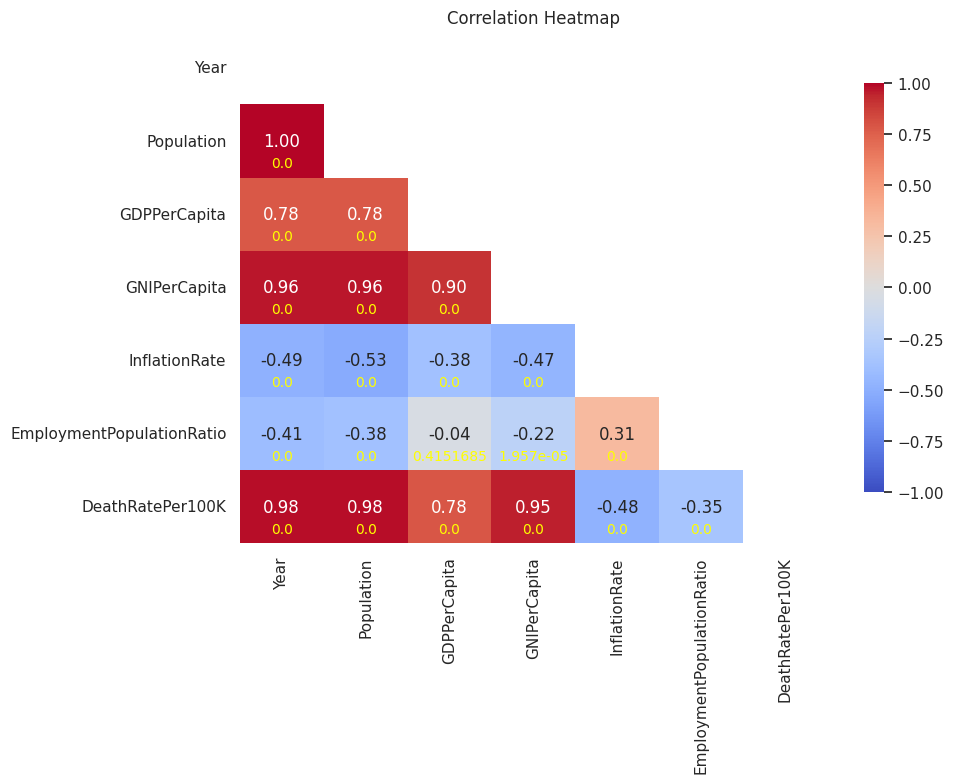

In [109]:
corr_matrix = df.corr(numeric_only=True, method='pearson')
# Calculate the p-values for the correlation coefficients
pvalues = round(df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1]), 8)
# Generate the heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, cbar_kws={'shrink': 0.8},
            ax=ax, vmin=-1, vmax=1, center=0)

# Update the heatmap labels with correlation coefficients and p-values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i >= j:
            continue
        corr = '{:f}'.format(corr_matrix.iloc[i, j]),
        pval = pvalues.iloc[i, j]
        ax.text(i+0.5, j+0.8, pval, ha='center', va='center', fontsize=10, color='yellow')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()

Acima, os valores das correlações são os números grandes (brancos ou pretos) no centro, e os p-values são os amarelos abaixo.

Já começamos com um simples mapa de calor das correlações das variáveis quantitativas. A correlação de 1 entre ano e população é indicativo claro de que a cada ano, a população cresceu sem exceções. Também, podemos ver que a cada ano, o Renda Nacional Bruta (RNB) também cresceu quase sempre, por isso a correlação de 0.96. Outras relações que valem a pena ser mencionadas são de PIB e RNB de 0.9, e o PIB com ano e população de 0.78. Todos com correlações fortíssimas positivas. Isso quer dizer que desde 1991, o Brasil cresceu em população, PIB e RNB quase que religiosamente.

Agora, a correlação entre nossa variável resposta e as variáveis independentes também são dignas de ser notadas. Ano e população têm um valor de 0.98 e RNB de 0.95. O que quer dizer que quase todos os anos, a taxa de suicídios a cada 100.000 habitantes só cresceu. Algo parecido, apesar de mais fraco, acontece com o PIB, com um valor de 0.78. Já a inflação e a empregabilidade têm correlações negativas, o que indica que, quanto maior eles são, menores os números de suicídio. No entanto, é importante notar que seus valores são -0.48 e -0.35 respectivamente, valores muito menores do que PIB e RNB.

A correlação nos pinta um cenário preocupante, que só é reforçado pelos p-values. A única correlação sem relevância estatística (com um p-value maior que 0.05) é a entre empregabilidade e PIB, que já era super baixa de qualquer forma (-0.04).

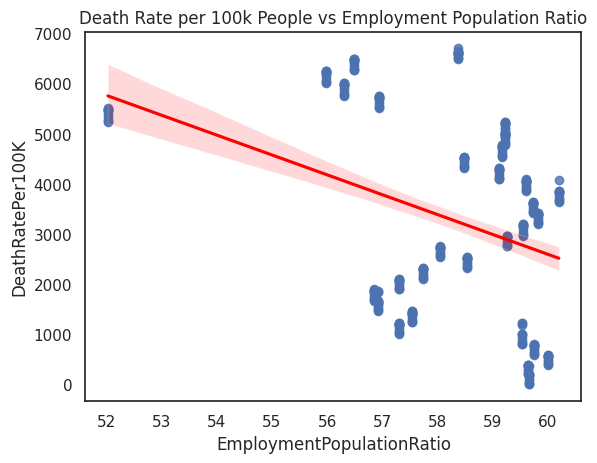

In [110]:
g = sns.regplot(x="EmploymentPopulationRatio", y="DeathRatePer100K", data=df, line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs Employment Population Ratio")
plt.show()

Tal qual o mapa de correlação mostrou acima, quanto menor a taxa de emprego, maior o número de suicídios. É fácil teorizar que um maior índice de desemprego pode gerar uma maior ansiedade na população e, com isso, um maior número de suicídios. Porém, esses outliers próximos de 52 podem estar impactando bastante a visualização, removendo-os temos:

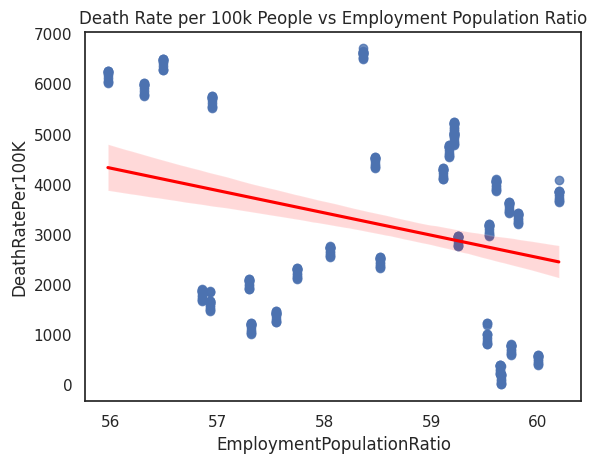

In [111]:
g = sns.regplot(x="EmploymentPopulationRatio", y="DeathRatePer100K", data=df.loc[df["EmploymentPopulationRatio"] > 53], line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs Employment Population Ratio")
plt.show()

Novamente, uma leve correlação negativa, mas com um valor ainda mais próximo de 0. Olhando os dados dessa forma, é difícil concluir que a razão de empregabilidade na população realmente tenha alguma correlação direta.

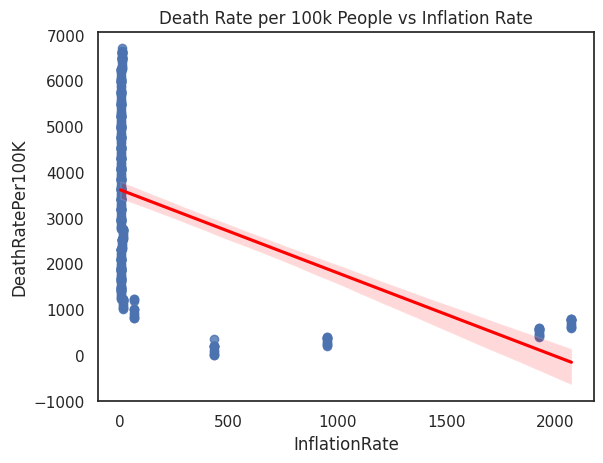

In [112]:
g = sns.regplot(x="InflationRate", y="DeathRatePer100K", data=df, line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs Inflation Rate")
plt.show()

A mesma coisa é a inflação, porém, é mais difícil de encontrar a correlação. Uma hipótese é a de que antes do Plano Real, quando a inflação era bem maior, o número de suicídios não era tão alta. Para isso, precisamos comparar a taxa de suicídios e a inflação ao longo dos anos.

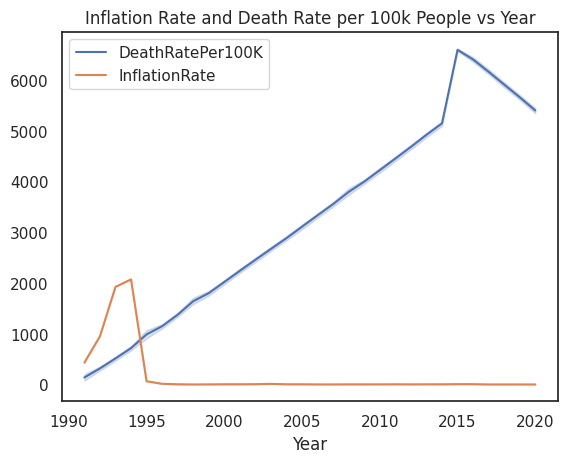

In [113]:
g = sns.lineplot(x=df['Year'],y=df['DeathRatePer100K'], label="DeathRatePer100K")
sns.lineplot(x=df['Year'],y=df['InflationRate'], label="InflationRate")
g.set(title="Inflation Rate and Death Rate per 100k People vs Year", ylabel="")
plt.show()

Como imaginado, antes do Plano Real, o número de suicídios era bem baixo, e conforme os anos se passaram, a inflação caiu, mas os suicídios continuaram crescendo. Então filtrando para somente inflação a partir de 1995, temos:

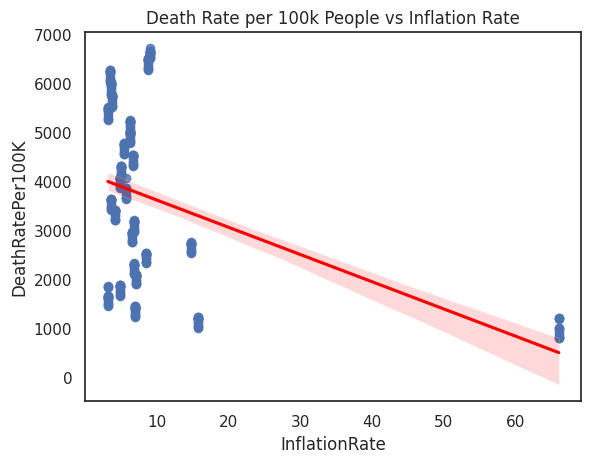

In [114]:
g = sns.regplot(x="InflationRate", y="DeathRatePer100K", data=df.loc[df['Year'] >= 1995], line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs Inflation Rate")
plt.show()

Mesmo só considerando após o plano Real, ainda temos um comportamento parecido, onde pouquíssimos valores caem no intervalo de confiança. É muito difícil de acreditar que haja alguma correlação direta entre essas duas variáveis.

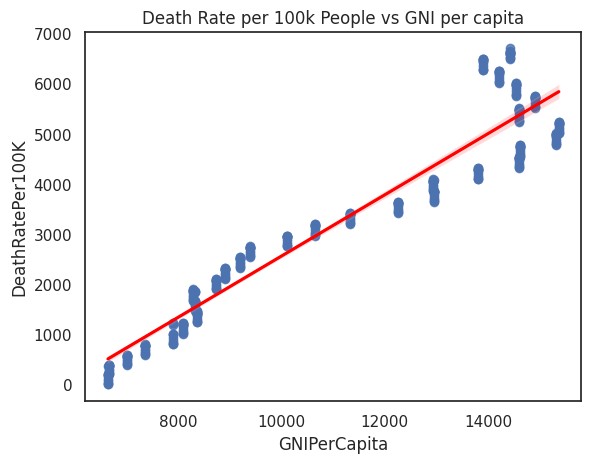

In [115]:
g = sns.regplot(x="GNIPerCapita", y="DeathRatePer100K", data=df, line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs GNI per capita")
plt.show()

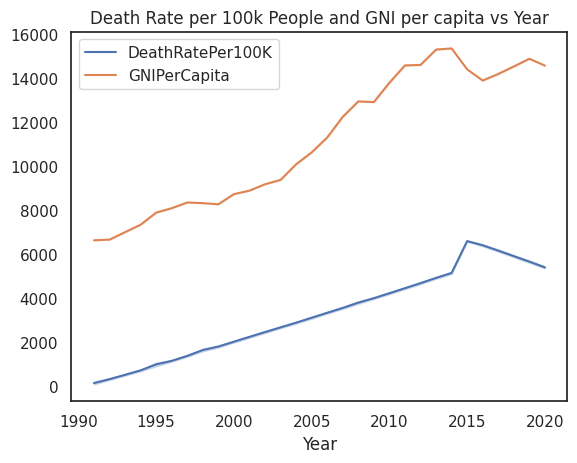

In [116]:
g = sns.lineplot(x=df['Year'],y=df['DeathRatePer100K'], label="DeathRatePer100K")
sns.lineplot(x=df['Year'],y=df['GNIPerCapita'], label="GNIPerCapita")
g.set(title="Death Rate per 100k People and GNI per capita vs Year", ylabel="")
plt.show()

A RNB (Renda Nacional Bruta) per capita mostra uma relação positiva bem clara: quanto maior a RNB, maior a taxa de suicídios. O que pode parecer contraintuitivo. Será que quanto mais a população produz, mais infeliz ela fica? Pode ser que sim, se a maior parte dessa renda não estiver na mão da parcela da população que esteja cometendo tais suicídios. Ou então, talvez haja uma terceira variável que influencie ambas as variáveis, criando assim uma correlação, mas não uma causalidade.

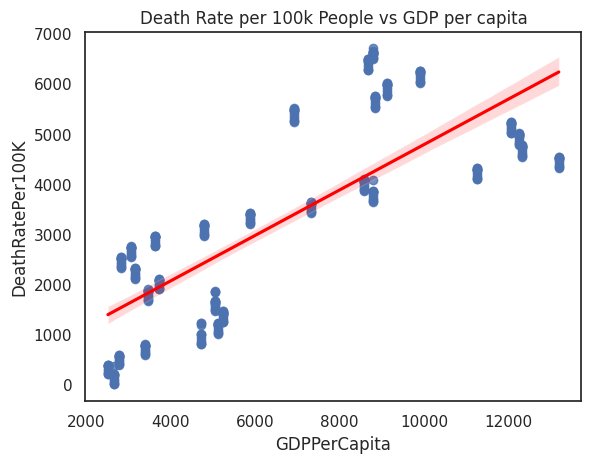

In [117]:
g = sns.regplot(x="GDPPerCapita", y="DeathRatePer100K", data=df, line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs GDP per capita")
plt.show()

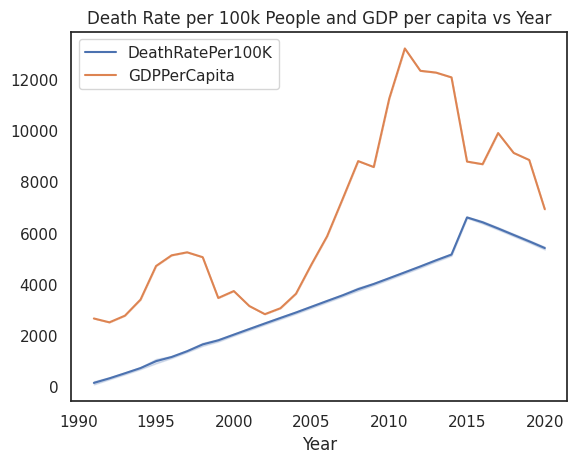

In [118]:
g = sns.lineplot(x=df['Year'],y=df['DeathRatePer100K'], label="DeathRatePer100K")
sns.lineplot(x=df['Year'],y=df['GDPPerCapita'], label="GDPPerCapita")
g.set(title="Death Rate per 100k People and GDP per capita vs Year", ylabel="")
plt.show()

Com o PIB per capita, temos uma correlação parecida com a RNB, porém, com muito mais ruído, deixando ainda mais difícil de explicar o comportamento.

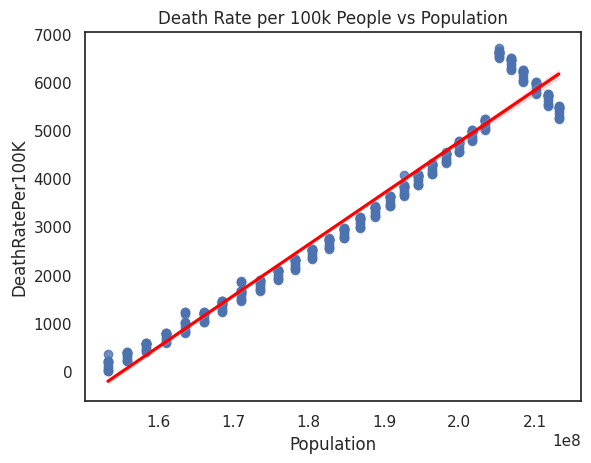

In [119]:
g = sns.regplot(x="Population", y="DeathRatePer100K", data=df, line_kws={'color': 'red'})
g.set(title="Death Rate per 100k People vs Population")
plt.show()

Já a população cria um caso quase de 1 para 1. É tentador pensar que quanto maior a população, maior a taxa de suicídios dado que há mais pessoas para cometê-los. Porém, vale lembrar que a variável dependente é a taxa de suicídios a cada 100.000 habitantes, portanto esse valor já deveria estar normalizado com a população.

## Variáveis qualitativas

Para finalizarmos a análise descritiva, vamos visualizar como as variáveis qualitativas impactam a variável resposta.

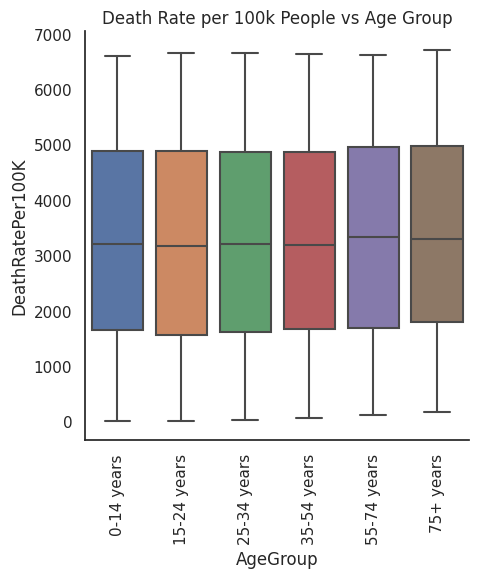

In [120]:
g = sns.catplot(x="AgeGroup", y="DeathRatePer100K", data=df, kind="box")
g.set_xticklabels(rotation=90)
g.set(title="Death Rate per 100k People vs Age Group")
plt.show()

Parece que a faixa etaria não influencia tanto, com apenas pessoas acima dos 75 anos tendo uma diferença visível, apesar de pouco considerável.

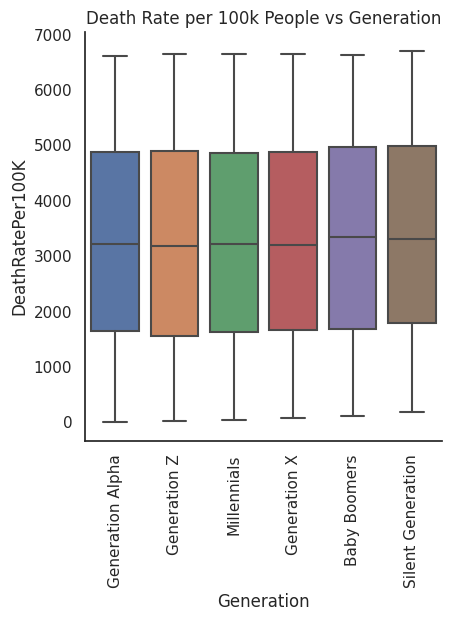

In [121]:
g = sns.catplot(x="Generation", y="DeathRatePer100K", data=df, kind="box")
g.set(title="Death Rate per 100k People vs Generation")
g.set_xticklabels(rotation=90)
plt.show()

As gerações têm um comportamento similar, com a Gerenção Silêncio sendo o único destaque.

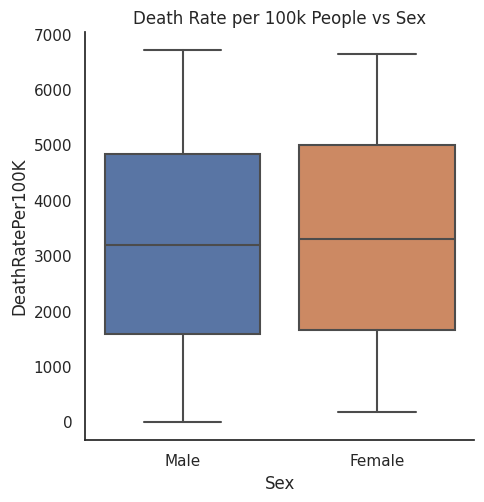

In [122]:
g = sns.catplot(x="Sex", y="DeathRatePer100K", data=df, kind="box")
g.set(title="Death Rate per 100k People vs Sex")
plt.show()

Já no gênero, as mulheres têm um mínimo e os 3 primeiros quartis maiores do que os homens, somente com o 4º quartil sendo inferior.

# Multicolinearidade

Antes de começarmos a criar os modelos, primeiro, precisaremos identificar a multicolinearidade entre as variáveis. Nós já vimos pelo mapa de correlação que algumas variáveis são têm uma grande correlação, mas agora veremos com maior detalhe quais são, e as removeremos.

Utilizaremos o método conhecido como [VIF](https://online.stat.psu.edu/stat462/node/180/) (Variance Inflation Factor). Felizmente, o Stats Model já nos dá uma função para calcular isso.

In [123]:
vif_df = df.drop(["DeathRatePer100K", "Sex", "AgeGroup", "Generation"], axis=1)
pd.Series([variance_inflation_factor(vif_df, i) 
                for i in range(vif_df.shape[1])], 
               index=vif_df.columns)

Year                         10222.196429
Population                   10204.267686
GDPPerCapita                   111.552381
GNIPerCapita                  2251.349977
InflationRate                    1.799210
EmploymentPopulationRatio     2281.535567
dtype: float64

Temos alguns números astronômicos aqui. Pegando uma linha de corte de que o VIF máximo aceitável seja 10, vamos remover duas variáveis:
* **Year:** Porque ano não é um fator socioeconômico, e ele tem o maior VIF de todos.
* **GNIPerCapita:** Porque o PIB tem uma grande correlação com a RNB, porém a RNB tem uma correlação muito maior com a variável resposta.
* **EmploymentPopulationRatio:** De todos os fatores acima, esse é o que menor correlação com a variável resposta.

In [124]:
year_df = df.Year
gni_df = df.GNIPerCapita
employment_df = df.EmploymentPopulationRatio
df.drop(["Year", "GNIPerCapita", "EmploymentPopulationRatio"], axis=1, inplace=True)

In [125]:
vif_df = df.drop(["DeathRatePer100K", "Sex", "AgeGroup", "Generation"], axis=1)
pd.Series([variance_inflation_factor(vif_df, i) 
                for i in range(vif_df.shape[1])], 
               index=vif_df.columns)

Population       8.229417
GDPPerCapita     7.716834
InflationRate    1.227034
dtype: float64

E agora, os VIFs estão aceitáveis.

# Mineração de dados

Antes de começarmos a criar os modelos, vamos separar o conjunto de dados entre dados de treino e teste.

In [126]:
np.random.seed(0)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

No mapa de correlação, nós havíamos visto que a população tinha uma correlação de 98% com a taxa de suicídios. Vejamos quão acurado fica um modelo que só leva esse fator em consideração.

In [127]:
model_population_only = smf.ols(formula='DeathRatePer100K ~ Population', data=train)
res_population_only = model_population_only.fit()
res_population_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DeathRatePer100K   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     7463.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.72e-213
Time:                        02:37:28   Log-Likelihood:                -2217.7
No. Observations:                 301   AIC:                             4439.
Df Residuals:                     299   BIC:                             4447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.668e+04    232.384    -71.793      0.000   -1.71e+04   -1.62e+04
Population     0.0001   1.24e-06     86.388      0.000       0.000       0.000
==============================================================================
Omnibus:                       85.775   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.784
Skew:                           1.378   Prob(JB):                     1.52e-44
Kurtosis:                       5.915   Cond. No.                     1.96e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Somente considerando a população, já temos um coeficiente de determinação de 96,1%! Um achado assombroso e super único. Além disso, temos um p-value de 0 para o modelo. Basicamente, pode-se criar uma fórmula para calcular o número de suicídios no Brasil para cada grupo demográfico separado gênero, faixa etária e geração ao longos dos anos que é:
* `f(x) = -16680 + 0.0001x`
Onde x é a população brasileira. Esse modelo nos mostra uma coisa que já havíamos visto na exploração dos dados, a relação entre a população e a taxa de suicídios a cada 100.000 habitantes é positiva.

Mas podemos ir mais a fundo. O que acontece se jogarmos todas as variáveis na regressão?

In [128]:
model_complete = smf.ols(formula='DeathRatePer100K ~ AgeGroup + Generation + Population + Sex + GDPPerCapita + InflationRate', data=train)
res_complete = model_complete.fit()
res_complete.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DeathRatePer100K   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     883.5
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.54e-205
Time:                        02:37:28   Log-Likelihood:                -2204.6
No. Observations:                 301   AIC:                             4429.
Df Residuals:                     291   BIC:                             4466.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -1.33e+04    278.004    -47.840      0.000   -1.38e+04   -1.28e+04
AgeGroup[T.15-24 years]         -1684.8220     42.552    -39.594      0.000   -1768.571   -1601.073
AgeGroup[T.25-34 years]         -1678.4612     43.753    -38.362      0.000   -1764.574   -1592.349
AgeGroup[T.35-54 years]         -1665.9926     43.366    -38.417      0.000   -1751.343   -1580.643
AgeGroup[T.55-74 years]         -3279.1902     81.972    -40.004      0.000   -3440.524   -3117.857
AgeGroup[T.75+ years]           -1635.3239     42.992    -38.038      0.000   -1719.938   -1550.710
Generation[T.Generation Alpha]  -3355.8411     81.773    -41.038      0.000   -3516.784   -3194.899
Generation[T.Generation X]      -1665.9926     43.366    -38.417      0.000   -1751.343   -1580.643
Generation[T.Generation Z]      -1684.8214     42.552    -39.594      0.000   -1768.571   -1601.072
Generation[T.Millennials]       -1678.4612     43.753    -38.362      0.000   -1764.574   -1592.349
Generation[T.Silent Generation] -1635.3239     42.992    -38.038      0.000   -1719.938   -1550.710
Sex[T.Male]                      -102.5493     43.080     -2.380      0.018    -187.337     -17.761
Population                          0.0001    2.1e-06     50.587      0.000       0.000       0.000
GDPPerCapita                        0.0244      0.011      2.306      0.022       0.004       0.045
InflationRate                       0.1596      0.047      3.361      0.001       0.066       0.253
==============================================================================
Omnibus:                      111.576   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.813
Skew:                           1.701   Prob(JB):                     1.78e-71
Kurtosis:                       6.796   Cond. No.                     1.96e+25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

O coeficiente de determinação sobe para 96,5%, com o valor ajustando sendo um pouco menor: 96,4%. Pouco crescimento para muitas variáveis novas, até por isso que os dois valores estão divergindo, mesmo que um pouco. Mas ainda sim, um modelo mais eficaz, respeitando os p-values.

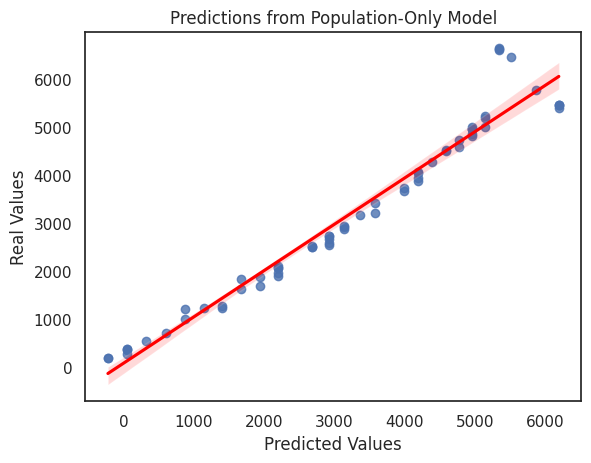

In [129]:
predictions = res_population_only.predict(test)
ax = sns.regplot(x=predictions, y=test['DeathRatePer100K'], line_kws={'color': 'red'})
ax.set(xlabel='Predicted Values', ylabel='Real Values', title="Predictions from Population-Only Model")
plt.show()

Somente considerando a população, já temos um modelo muito bom, que chega muito perto do real.

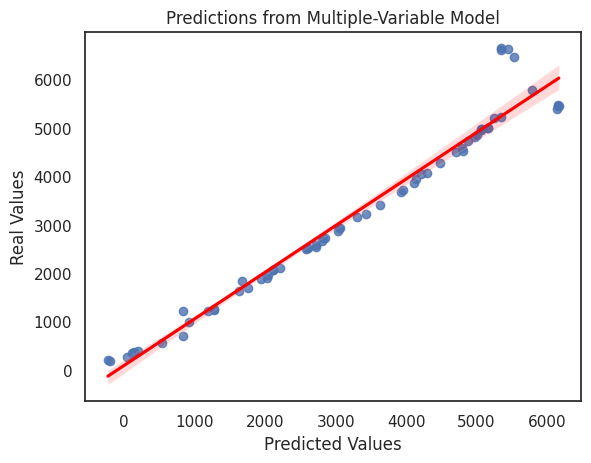

In [130]:
predictions = res_complete.predict(test)
ax = sns.regplot(x=predictions, y=test['DeathRatePer100K'], line_kws={'color': 'red'})
ax.set(xlabel='Predicted Values', ylabel='Real Values', title="Predictions from Multiple-Variable Model")
plt.show()

Mas o modelo com todas as outras variáveis consegue ser ainda melhor.

# Agrupando dados por ano

Todos esses achados são dignos de nota, mas é sempre bom lembrar que uma característica desse conjunto de dados é que os dados de suicídios estão divididos por ano, gênero, faixa etária e geração. Ambos os modelos acima estão prevendo o número de suicídios a cada 100.000 habitantes dentro de um determinado grupo demográfico (gênero, faixa etária e geração) a cada ano.

Mas fica a dúvida: e se nós quiséssemos saber o número de suicídios a cada 100.000 habitantes de toda a população brasileira? Para isso, precisaremos agrupar os dados por ano, removendo as variáveis demográficas.

In [131]:
year = year_df[0]
gni = gni_df[0]
employment = employment_df[0]
death_rate = 0
new_df = []

for index, row in df.iterrows():
    if year != year_df[index]:
        new_df.append([
            population,
            gdp,
            gni,
            inflation,
            employment,
            death_rate,
        ])
        year = year_df[index]
    
    death_rate += row['DeathRatePer100K']
    population = row['Population']
    gdp = row['GDPPerCapita']
    gni = gni_df[index]
    inflation = row['InflationRate']
    employment = employment_df[index]
        
df_annual = pd.DataFrame(new_df, columns=[
 'Population',
 'GDPPerCapita',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio',
 'DeathRatePer100K',
])
df_annual.head()

,Population,GDPPerCapita,GNIPerCapita,InflationRate,EmploymentPopulationRatio,DeathRatePer100K
0,153336445.0,2656.497207,6640.0,432.786662,59.651,1184.026613
1,155900790.0,2505.377758,6670.0,951.962053,59.646,2791.980089
2,153336445.0,2656.497207,6640.0,432.786662,59.651,3153.899282
3,155900790.0,2505.377758,6670.0,951.962053,59.646,5056.642974
4,158440875.0,2766.345596,7010.0,1927.380790,59.997,11255.026962


Agora que agrupamos os dados anualmente, vamos verificar o fator de multicolinearidade.

In [132]:
vif_annual_df = df_annual.drop(["DeathRatePer100K"], axis=1)
pd.Series([variance_inflation_factor(vif_annual_df, i) 
                for i in range(vif_annual_df.shape[1])], 
               index=vif_annual_df.columns)

Population                   1576.474993
GDPPerCapita                   57.797716
GNIPerCapita                  574.850602
InflationRate                   1.653554
EmploymentPopulationRatio     559.385683
dtype: float64

O comportamento mudou bastante, e parece que população passou a ser nosso maior problema. Com PIB e razão de empregabilidade vindo logo em seguida. Porém, só removendo os dois últimos, já passamos a ter somente VIF aceitáveis.

In [133]:
df_annual.drop(["GNIPerCapita", "EmploymentPopulationRatio"], axis=1, inplace=True)

In [134]:
vif_annual_df = df_annual.drop(["DeathRatePer100K"], axis=1)
pd.Series([variance_inflation_factor(vif_annual_df, i) 
                for i in range(vif_annual_df.shape[1])], 
               index=vif_annual_df.columns)

Population       8.290954
GDPPerCapita     7.666831
InflationRate    1.273331
dtype: float64

Com eles removidos, tivemos os melhors VIFs até o momento, com valores quase perfeitamente não-colineares. O problema é que com isso, só tivemos 2 variáveis independentes. Agora, vamos separar o novo dataframe em dados de teste e treino novamente.

In [135]:
np.random.seed(0)
msk = np.random.rand(len(df_annual)) < 0.8
train = df_annual[msk]
test = df_annual[~msk]

A seguir, vamos criar as regressões lineares. Antes, somente com população, pudemos criar um modelo extremamente acurado. Será que conseguimos repetir o feito?

In [136]:
model_population_only = smf.ols(formula='DeathRatePer100K ~ Population', data=train)
res_population_only = model_population_only.fit()
res_population_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DeathRatePer100K   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     305.5
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.12e-17
Time:                        02:37:29   Log-Likelihood:                -399.52
No. Observations:                  31   AIC:                             803.0
Df Residuals:                      29   BIC:                             805.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.635e+06   1.71e+05    -15.435      0.000   -2.98e+06   -2.29e+06
Population     0.0163      0.001     17.478      0.000       0.014       0.018
==============================================================================
Omnibus:                        5.073   Durbin-Watson:                   0.214
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.870
Skew:                           0.855   Prob(JB):                        0.144
Kurtosis:                       3.265   Cond. No.                     1.76e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mais uma vez, somente considerando a população, já temos um modelo extremamente acurado, apesar dessa vez ter um conficiente de determinação de 91,3%, 5,8% menor do que o para dados demográficos. Novamente, encontramos um p-value de 0. Agora, a nossa regressão linear simples para calcular o número de suicídios em um dado ano no Brasil é:
* `f(x) = -2635000 + 0.0163x`
Onde x é a população brasileira naquele ano. Neste modelo, a correlação entre população e a taxa de suicídios permanece positiva.

E o que acontece se jogarmos todas as variáveis na regressão? Será que teremos um R² menor novamente?

In [137]:
model_complete = smf.ols(formula='DeathRatePer100K ~ Population + GDPPerCapita + InflationRate', data=train)
res_complete = model_complete.fit()
res_complete.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DeathRatePer100K   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     115.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.68e-15
Time:                        02:37:29   Log-Likelihood:                -396.74
No. Observations:                  31   AIC:                             801.5
Df Residuals:                      27   BIC:                             807.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -2.66e+06   2.59e+05    -10.257      0.000   -3.19e+06   -2.13e+06
Population        0.0160      0.002      9.811      0.000       0.013       0.019
GDPPerCapita      9.9955      8.835      1.131      0.268      -8.133      28.124
InflationRate    76.6663     37.628      2.037      0.052      -0.540     153.872
==============================================================================
Omnibus:                       10.599   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.421
Skew:                           1.251   Prob(JB):                      0.00900
Kurtosis:                       4.015   Cond. No.                     2.82e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assim como a regressão simples da população, parece que, no geral, os modelos para a população geral são menos acuradas do que quando a dividimos por dados demográficos. Neste caso, temos um coeficiente de determinação de 92,8%. Porém, vemos claramente que os p-values da taxa de inflação e da RNB são ambos maiores do que os 5% permitidos. Ou seja, no fim, o único modelo que faz sentido para esses dados é a regressão linear simples somente levando em consideração a população.

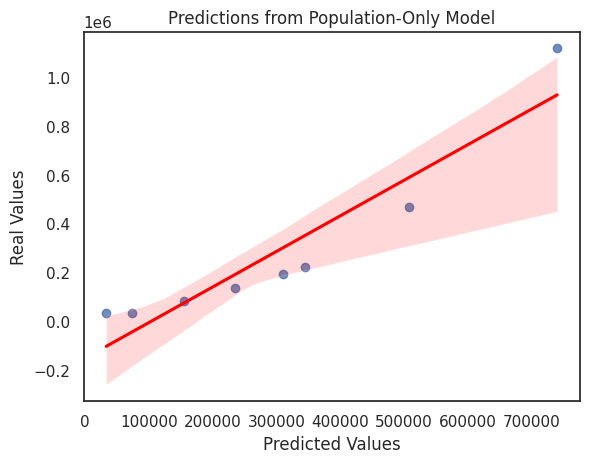

In [138]:
predictions = res_population_only.predict(test)
ax = sns.regplot(x=predictions, y=test['DeathRatePer100K'], line_kws={'color': 'red'})
ax.set(xlabel='Predicted Values', ylabel='Real Values', title="Predictions from Population-Only Model")
plt.show()

Quase todos os dados caem dentro da intervalo de confiança da predição.

# Conclusão

**Para prever prever taxas de suicídios anuais com grupos separados por sexo, faixa-etária e geração:** Considerando somente a população, conseguimos criar uma regressão linear simples com 96,1% de determinação. Agora, considerando ano, faixa etária, geração, gênero, RNB per capita, população e taxa de inflação, conseguimos gerar uma regressão linear com 96,5% de determinação.

**Para prever taxas de suicídio anuais da população brasileira como um todo:** Somente com a população, a regressão linear simples tem o coeficiente de determinação de 91,3%, e com outros fatores, não conseguimos respeitas o p-value inferior a 5%. 

Todos os modelos com um Prob(F-stats) de 0, e com todas as variáveis tendo um p-value menor do que 5%. É evidente que há sim uma correlação entre fatores socioeconômicos e a taxa de suicídios a cada 100.000 habitantes no Brasil, quando se tratando dos dados separados por grupo econômico, mas quando os reagrupamos para a população inteira, eles parecem não influenciar tanto. Além disso, em ambos os casos, fica evidente que o tamanho da população é o fator que mais se correlaciona com a variável resposta.